In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from datetime import datetime

In [2]:
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %H:%T:$S')
df.date

0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: date, Length: 8759, dtype: datetime64[ns]

In [4]:
df = df.set_index('date').sort_index()

In [5]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


<AxesSubplot:xlabel='date'>

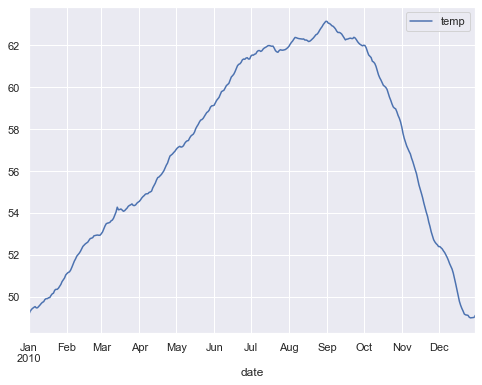

In [6]:
df.resample('D').mean().plot()

### 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

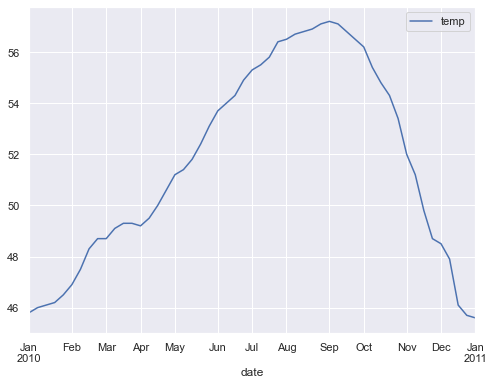

In [7]:
df.resample('W').min().plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

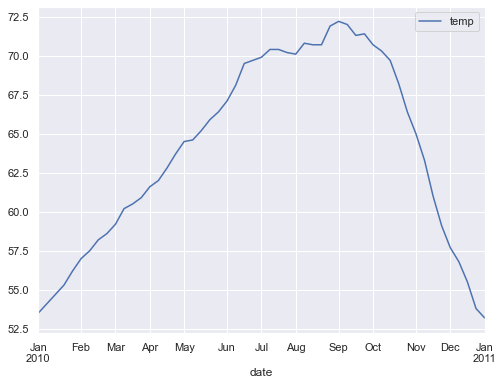

In [8]:
df.resample('W').max().plot()

### 4. Which month is the coldest, on average?

In [9]:
data_by_month = pd.DataFrame(df.resample('1m').mean())

In [10]:
df.resample('M').mean().reset_index().temp.min()

49.984139784946244

In [11]:
data_by_month[data_by_month.temp == data_by_month.temp.min()].index.month_name()

Index(['January'], dtype='object', name='date')

### 5. Which month has the highest average temperature?

In [12]:
df.resample('M').mean().reset_index().temp.agg('max')

62.48708333333335

In [13]:
data_by_month[data_by_month.temp == data_by_month.temp.max()].index.month_name()

Index(['September'], dtype='object', name='date')

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [14]:
# data_by_day = pd.DataFrame(df.resample('1d').mean())
# # data_by_day.temp.min(), data_by_day.temp.max()
# data_by_day.head()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49


In [15]:
# min_max_by_day = df.resample('1d').temp.agg(['min','max'])

# # min_max_by_day['diff'] = min_max_by_day.max() - min_max_by_day.min()

In [24]:
# min_max_by_day

#this df was giving me issues with the min max columns and adding/subtracting

In [19]:
daily = df. temp.resample('D').agg(['min','max'])
daily.head()

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80


In [20]:
daily['temp_diff'] = daily['max'] - daily['min']

In [21]:
daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70


In [22]:
daily.resample('M').max().temp_diff.sort_values()

date
2010-12-31    8.90
2010-01-31    9.30
2010-02-28    9.90
2010-11-30   11.80
2010-03-31   12.00
2010-04-30   13.00
2010-05-31   13.10
2010-10-31   14.40
2010-06-30   14.80
2010-07-31   14.80
2010-09-30   14.90
2010-08-31   15.00
Name: temp_diff, dtype: float64

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

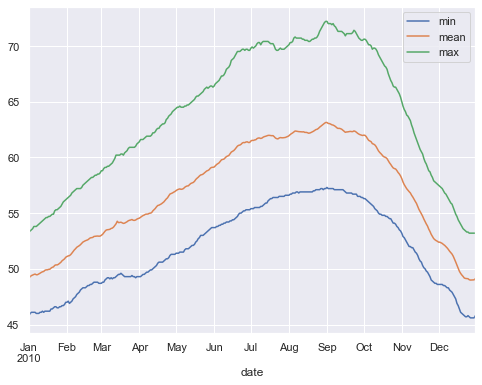

In [23]:
df.temp.resample('D').agg(['min','mean','max']).plot()

# Seattle Weather Dataset

In [28]:
from vega_datasets import data
precip_df = data.seattle_weather()

In [34]:
%timeit precip_df.head()

24.8 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [35]:
precip_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [32]:
precip_df.date.resample('Y').groupby('M')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

### 2. Visualize the amount of monthly precipitation over time.
### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
### 4. Which year-month combination is the windiest?
### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
### 6. In which month does it rain the most?
### 7. Which month has the most number of days with a non-zero amount of precipitation?